# Predicting Car Prices

... some description ...

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set_style('darkgrid')

## Dataset

In [4]:
headers = [
    "symboling","normalized_losses","make","fuel_type","aspiration","num_doors",
    "body_style","drive_wheels","engine_location","wheel_base","length","width","height",
    "curb_weight","engine_type","num_cylinders","engine_size","fuel_system","bore",
    "stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"
]
cars = pd.read_csv('imports-85.data', header = None, names = headers, na_values = ['?'])
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

## Data Cleaning

### normalized_losses 

In [6]:
losses_null_bool = cars['normalized_losses'].isnull()
losses_null_count = losses_null_bool.sum()
print('"normalized_losses" null count: {} - {:.0%} of rows affected'.format(losses_null_count, losses_null_count / len(cars)))

"normalized_losses" null count: 41 - 20% of rows affected


In [7]:
cars[losses_null_bool].isnull().sum(axis=1).value_counts()

1    34
2     5
3     2
dtype: int64

**remove rows with null values for 'normalized_losses' and 'price'**

In [8]:
cars = cars.dropna(subset=['normalized_losses', 'price'], how='all')
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized_losses    164 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            199 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_cylinders        201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-

In [9]:
cars['normalized_losses'].describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

In [10]:
def show_corr(col):
    print('\n"{}" correlations'.format(col))
    corr = cars.corr()[col]
    plt.figure(figsize=(8,6))
    return corr.sort_values().plot.barh()


"normalized_losses" correlations


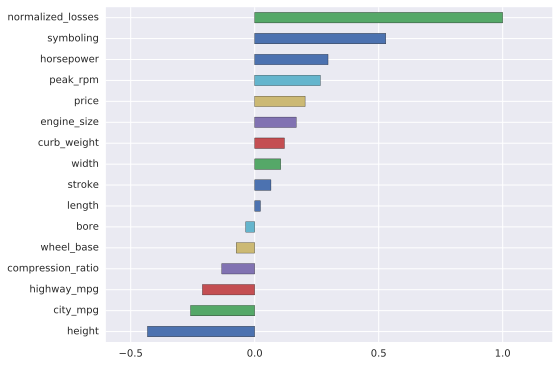

In [11]:
show_corr('normalized_losses');

**fill "normalized_losses" null values with "symboling" group mean**

In [12]:
cars['normalized_losses'] = cars\
    .groupby('symboling')['normalized_losses']\
    .apply(lambda s: s.fillna(s.mean()))

old_losses_null_bool = losses_null_bool

print('\nvalue counts of "normalized_losses" that were previously null')
cars['normalized_losses'][old_losses_null_bool].value_counts(dropna=False)


value counts of "normalized_losses" that were previously null


113.166667    17
168.647059    10
128.574468     5
125.689655     3
85.600000      2
Name: normalized_losses, dtype: int64

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized_losses    201 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            199 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_cylinders        201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-

### "num_doors" and "num_cylinders"

In [14]:
cars['num_doors'].value_counts(dropna=False)

four    113
two      86
NaN       2
Name: num_doors, dtype: int64

In [15]:
cars['num_cylinders'].value_counts(dropna=False)

four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num_cylinders, dtype: int64

In [16]:
string_num_dict = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12,
}

cars[['num_doors', 'num_cylinders']] = cars[['num_doors', 'num_cylinders']].replace(string_num_dict)
cars['num_doors'].value_counts(dropna=False)

 4.0    113
 2.0     86
NaN       2
Name: num_doors, dtype: int64

In [17]:
cars['num_cylinders'].value_counts(dropna=False)

4     157
6      24
5      10
8       4
2       4
12      1
3       1
Name: num_cylinders, dtype: int64

In [18]:
print('body_style "sedan" num_doors')
cars[cars['body_style'] == 'sedan']['num_doors'].value_counts()

body_style "sedan" num_doors


4.0    78
2.0    14
Name: num_doors, dtype: int64

**fill missing "num_doors" values with the most frequent value (4)**

In [19]:
cars['num_doors'] = cars['num_doors'].fillna(4)
cars['num_doors'].value_counts(dropna=False)

4.0    115
2.0     86
Name: num_doors, dtype: int64

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized_losses    201 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            201 non-null float64
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_cylinders        201 non-null int64
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-

### "bore" and "stroke"

In [21]:
cars[cars.bore.isnull()].iloc[:,:20]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN


**Four rows contain all the missing "bore" and "stroke" values - remove them**

In [22]:
cars = cars.dropna(subset=['bore'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized_losses    197 non-null float64
make                 197 non-null object
fuel_type            197 non-null object
aspiration           197 non-null object
num_doors            197 non-null float64
body_style           197 non-null object
drive_wheels         197 non-null object
engine_location      197 non-null object
wheel_base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb_weight          197 non-null int64
engine_type          197 non-null object
num_cylinders        197 non-null int64
engine_size          197 non-null int64
fuel_system          197 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    197 non-null float64
horsepower           195 non-

### "horsepower" and "peak_rpm"

In [23]:
cars[cars.horsepower.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,113.166667,renault,gas,std,4.0,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,125.689655,renault,gas,std,2.0,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [24]:
cars = cars.dropna(subset=['horsepower'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
symboling            195 non-null int64
normalized_losses    195 non-null float64
make                 195 non-null object
fuel_type            195 non-null object
aspiration           195 non-null object
num_doors            195 non-null float64
body_style           195 non-null object
drive_wheels         195 non-null object
engine_location      195 non-null object
wheel_base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb_weight          195 non-null int64
engine_type          195 non-null object
num_cylinders        195 non-null int64
engine_size          195 non-null int64
fuel_system          195 non-null object
bore                 195 non-null float64
stroke               195 non-null float64
compression_ratio    195 non-null float64
horsepower           195 non-

**Two rows contain all the missing "horsepower" and "peak_rpm" values - remove them**

## Feature Selection

**target**

In [25]:
target = 'price'

**features**

In [26]:
features = [ col for col in cars.select_dtypes('number').columns.tolist() if col != target ]
print(*features, sep='\n')

symboling
normalized_losses
num_doors
wheel_base
length
width
height
curb_weight
num_cylinders
engine_size
bore
stroke
compression_ratio
horsepower
peak_rpm
city_mpg
highway_mpg


## Normalize columns

In [60]:
norm_cars = (cars[features] - cars[features].mean()) / cars[features].std()
norm_cars[target] = cars[target]
norm_cars

,symboling,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.791895,1.335577,-1.183296,-1.679117,-0.437378,-0.837593,-2.111810,-0.020964,-0.407729,0.049755,0.517224,-1.815604,-0.294176,0.204073,-0.212456,-0.683346,-0.562432,13495.0
1,1.791895,1.335577,-1.183296,-1.679117,-0.437378,-0.837593,-2.111810,-0.020964,-0.407729,0.049755,0.517224,-1.815604,-0.294176,0.204073,-0.212456,-0.683346,-0.562432,16500.0
2,0.166688,0.164997,-1.183296,-0.716957,-0.245016,-0.181082,-0.609793,0.503130,1.555410,0.580721,-2.388623,0.699402,-0.294176,1.339545,-0.212456,-0.995779,-0.708860,16500.0
3,0.979292,1.199829,0.840763,0.147356,0.187800,0.147174,0.182938,-0.423086,-0.407729,-0.457076,-0.512697,0.476553,-0.047998,-0.033583,0.855301,-0.214697,-0.123149,13950.0
4,0.979292,1.199829,0.840763,0.082124,0.187800,0.240961,0.182938,0.505035,0.573840,0.194564,-0.512697,0.476553,-0.540353,0.309699,0.855301,-1.151995,-1.294570,17450.0
5,0.979292,0.080728,-1.183296,0.147356,0.243906,0.194068,-0.317734,-0.099101,0.573840,0.194564,-0.512697,0.476553,-0.417265,0.177667,0.855301,-0.995779,-0.855287,15250.0
6,0.166688,1.024560,0.840763,1.125823,1.478232,2.585645,0.767055,0.543151,0.573840,0.194564,-0.512697,0.476553,-0.417265,0.177667,0.855301,-0.995779,-0.855287,17710.0
7,0.166688,0.164997,0.840763,1.125823,1.478232,2.585645,0.767055,0.752788,0.573840,0.194564,-0.512697,0.476553,-0.417265,0.177667,0.855301,-0.995779,-0.855287,18920.0
8,0.166688,1.024560,0.840763,1.125823,1.478232,2.585645,0.850501,1.004353,0.573840,0.073890,-0.733394,0.476553,-0.466500,0.969857,0.855301,-1.308211,-1.587425,23875.0
10,0.979292,2.017750,-1.183296,0.375665,0.203830,-0.509337,0.182938,-0.312550,-0.407729,-0.481211,0.627572,-1.433578,-0.343411,-0.059990,1.495955,-0.370914,-0.269577,16430.0


## Train Model

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [76]:
def split_df(split_portion, df):
    split = int(len(df) * 0.75) + 1
    first = df[:split].copy()
    second = df[split:].copy()
    return first, second

def knn_train_test(feature_cols, target_col, df, k = 5):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_df, test_df = split_df(0.75, rand_df)
    knn = KNeighborsRegressor(k)
    knn.fit(train_df[feature_cols], train_df[target_col])
    prediction = knn.predict(test_df[feature_cols])
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = mse ** (1/2)
    return rmse

In [77]:
rmse_uni_data = [
    { 'column': col, 'rmse': knn_train_test([col], target, norm_cars) }
    for col in norm_cars.columns.tolist()
    if col != target
]

rmse_uni = pd.DataFrame(rmse_uni_data).set_index('column', drop=True)
sorted_rmse_cols = rmse_uni.sort_values('rmse').index.tolist()
print(rmse_uni_df)

                          rmse
column                        
symboling          7401.103889
normalized_losses  6452.251348
num_doors          7338.789751
wheel_base         3947.294831
length             3661.179094
width              4261.747429
height             6010.232553
curb_weight        4520.464814
num_cylinders      5010.580350
engine_size        3559.211417
bore               6002.695071
stroke             6264.740132
compression_ratio  7009.101501
horsepower         4504.094203
peak_rpm           6332.195029
city_mpg           3689.476726
highway_mpg        4569.742224


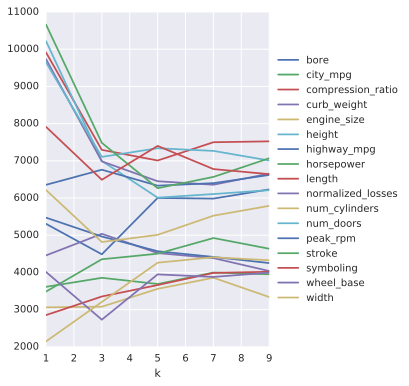

In [113]:
k_values = [ 1, 3, 5, 7, 9 ]

rmse_univar_k_data = [{
    'k': k, 
    'column': col, 
    'rmse': knn_train_test([col], target, norm_cars, k)
} for k in k_values for col in features ]

rmse_univar_k = pd.DataFrame(rmse_univar_k_data)

fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(2000, 11000)

for name, group in rmse_univar_k.groupby('column'):
    group.plot.line(x='k', y='rmse', ax=ax, label=name);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## Features and Hyperparameters

In [79]:
limits = [ 2, 3, 4, 5 ]

rmse_multivar_data = [{
    'num_best_features': limit,
    'rmse': knn_train_test(sorted_rmse_cols[:limit], target, norm_cars)
} for limit in limits]

print('\nmultivariate model RMSE by number of best features')
rmse_multivar = pd.DataFrame(rmse_multivar_data)\
    .set_index('num_best_features')\
    .sort_values('rmse')

print(rmse_multivar)


multivariate model RMSE by number of best features
                          rmse
num_best_features             
5                  2918.571604
4                  3097.877129
3                  3125.431772
2                  3190.668379


In [90]:
rmse_multi_k_data = [{
    'num_best_cols': num_best_cols, 
    'k': k, 
    'rmse': knn_train_test(sorted_rmse_cols[:num_best_cols], target, norm_cars, k)
} for k in range(1, 26) 
    for num_best_cols in rmse_multivar.sort_values('rmse').head(3).index.tolist()
]

def find_best_model(g):
    return g.sort_values('rmse').head(1)[['k', 'rmse']]
        
rmse_multi_k = pd.DataFrame(rmse_multi_k_data)
rmse_multi_k.groupby('num_best_cols').apply(find_best_model)

,,k,rmse
num_best_cols,,,
3,8,3,2869.456618
4,7,3,2737.560473
5,3,2,2047.093287


least RMSE columns (sorted):
engine_size, length, city_mpg, wheel_base, width


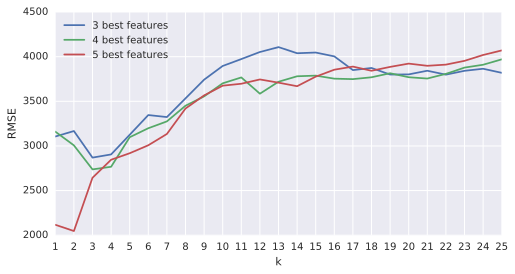

In [107]:
print('least RMSE columns (sorted):')
print(*sorted_rmse_cols[:5], sep=', ')

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_ylim(2000, 4500)
ax.set_ylabel('RMSE')
ax.set_xticks(range(1, 26))

for name, group in rmse_multi_k.groupby('num_best_cols'):
    group.plot.line(x='k', y='rmse', ax=ax, label='{} best features'.format(name));
    
plt.legend(loc='upper left');